# Homework 6: Perturbed QM Oscillator (20 points)

Group Members: Julius Franke (el442, juliusttf@gmail.com), Erik Meister (kd400, erik.meister@me.com), Eugen Dizer (qo452, eugen9898@web.de)

Due on Friday, 05.06.2020.

In [1]:
#Load standard libraries
import numpy as np   
import matplotlib.pyplot as plt
from scipy.linalg import eigh
%matplotlib inline

Calculate the eigenvalues of the perturbed quantum mechanical harmonic oscillator for $n = 0 \dots 9$ by approximating the operators in Hilbert space by matrices with finite dimension in the range $N = 15 \dots 30$.

The dimensionless Hamiltonian reads

\begin{align}
h = \frac{H}{\hbar \omega} &= \left( \frac{1}{2} \Pi^2 + \frac{1}{2} Q^2 + \lambda Q^4 \right) \\
\left(h\right)_{nm} &= \left(h_0\right)_{nm} + \lambda \left(Q^4\right)_{nm}
\end{align}

where $\left(h_0\right)_{nm} = \left(n + \frac{1}{2}\right) \delta_{nm}$ is the unperturbed Hamiltonian.

### 1. Determine the matrix form of $Q^4$ using
### $$Q_{nm} = \frac{1}{\sqrt{2}} \left(\sqrt{n+1} \delta_{n, m-1} + \sqrt{n} \delta_{n, m+1} \right) .$$

The operator $Q$ can be written in terms of creation an annihilation operators, $a^{\dagger}$ and $a$, as follows:

$$ Q = \frac{1}{\sqrt{2}} \left(a + a^{\dagger} \right) .$$

With the commutator relations $\left[a , a^{\dagger}\right] = 1$, $\left[a , N\right] = a$ and $\left[a^{\dagger} , N\right] = - a^{\dagger}$, where $N = a^{\dagger} a$ is the number operator, one obtains

$$Q^2 = \frac{1}{2} \left( a^2 + 2N + 1 + \left(a^{\dagger}\right)^2 \right)$$
and finally
$$Q^4 = \frac{1}{4} \left( a^4 + (4N + 6)a^2 + (6N^2 + 6N + 3) + (4N - 2)\left(a^{\dagger}\right)^2 + \left(a^{\dagger}\right)^4 \right).$$
In matrix form this is
\begin{align}
\left(Q^4\right)_{nm} = \frac{1}{4} \Big( &\sqrt{(n+1)(n+2)(n+3)(n+4)} \ \delta_{n, m-4} \\
&+ (4n + 6)\sqrt{(n+1)(n+2)} \ \delta_{n, m-2} \\
&+ (6n^2 + 6n + 3) \ \delta_{n,m} \\
&+ (4n - 2)\sqrt{n(n-1)} \ \delta_{n, m+2}  \\
&+ \sqrt{n(n-1)(n-2)(n-3)} \ \delta_{n, m+4} \Big).
\end{align}

In [2]:
#Implementation of h for arbitrary matrix size N
def unperturbed_hamiltonian(N):
    matrix = np.zeros(shape = (N,N))
    for i in range(N):
        matrix[i][i] = i + 1/2

    return matrix

#Implementation of Q
def Q(N):
    matrix = np.zeros(shape = (N,N))
    for i in range(N-1):
        matrix[i][i+1] = np.sqrt(i+1)
        matrix[i+1][i] = np.sqrt(i+1)

    return matrix / np.sqrt(2)

One can obtain the matrix representation of $Q^4$ just by taking the matrix $Q$ to the power of 4:

In [3]:
#Simple way to get Q^4 directly out of Q
def Q4(N):
    N += 2
    Q2 = np.matmul(Q(N),Q(N))
    Q4 = np.matmul(Q2,Q2)

    return Q4[:-2,:-2]

Due to the finite matrix size, one gets some artefacts at the border of the matrix, so one has the shorten the output. But in general this leads to the same result as the implementation of $Q^4$ via the analytic formula:

In [4]:
#Q^4 out of the calculation with a and a*
def Q4_formula(N):
    matrix = np.zeros(shape = (N,N))
    for i in range(N):
        matrix[i][i] = 6*i**2 + 6*i + 3
    for i in range(N-2):
        matrix[i][i+2] = (4*i + 6) * np.sqrt((i+1)*(i+2))
        matrix[i+2][i] = (4*i + 6) * np.sqrt((i+1)*(i+2))
    for i in range(N-4):
        matrix[i][i+4] = np.sqrt((i+1)*(i+2)*(i+3)*(i+4))
        matrix[i+4][i] = np.sqrt((i+1)*(i+2)*(i+3)*(i+4))

    return matrix / 4

The matrix representation of the full Hamiltonian is thus given by:

In [5]:
def hamiltonian(lamb, N):
    return unperturbed_hamiltonian(N) + lamb * Q4_formula(N)

### 2. Compute the eigenvalues of $(h)_{nm}$ for the parameter $\lambda = 0.1$ as function of the matrix size $(N = 15 \dots 30)$. Demonstrate that your program works properly, just listing the eigenvalues is not sufficient.

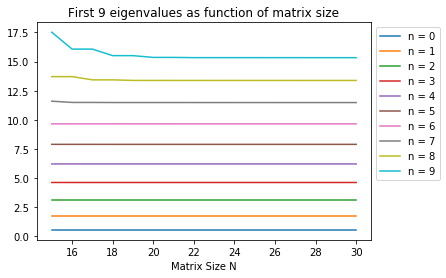

In [6]:
#Calculate the eigenvalues for matrix size N and lambda = 0.1
def eigenvalue(N):
    return eigh(hamiltonian(0.1, N))[0]

#Take the first 10 eigenvalues for each matrix size N between 15 and 30
eigenvalues = []
for i in range(15, 31):
    eigenvalues.append(eigenvalue(i)[:10])

eigenvalues = np.array(eigenvalues)

N = np.linspace(15, 30, 16)
for i in range(10):
    plt.plot(N, eigenvalues[:,i], label = "n = {}".format(i))

plt.title("First 9 eigenvalues as function of matrix size")
plt.xlabel("Matrix Size N")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

The first 10 eigenvalues are:

In [7]:
print(eigenvalue(30)[:10])

[  0.55914633   1.76950264   3.13862431   4.62888281   6.2203009
   7.89976723   9.65784064  11.4873175   13.38247933  15.33868582]


To demonstrate that the program works properly consider both sides of the eigenvalue equation: $h \psi = \varepsilon \psi$.

In [8]:
#Choose lambda = 0.1 and N = 4. Demonstrate for the 1st eigenvalue.
matrix = hamiltonian(0.1, 4)
eigenval = eigh(matrix)[0][1]
eigenvec = eigh(matrix)[1][:,1]

In [9]:
np.matmul(matrix, eigenvec)

array([ 0.        , -1.74592707,  0.        ,  0.29665452])

In [10]:
eigenval * eigenvec

array([ 0.        , -1.74592707,  0.        ,  0.29665452])

They coincide indeed!

Although it has some problems with larger vectors and very small numbers:

In [11]:
matrix = hamiltonian(0.1, 10)
eigenval = eigh(matrix)[0][1]
eigenvec = eigh(matrix)[1][:,1]

In [12]:
print(np.matmul(matrix, eigenvec))

[ -4.25668881e-16  -1.74303346e+00  -5.29792232e-15   3.04383239e-01
   3.73369659e-15  -9.24936594e-03   1.44781430e-16  -1.58016563e-02
   2.06962047e-15   5.94612392e-03]


In [13]:
print(eigenval * eigenvec)

[ -4.64158363e-16  -1.74303346e+00  -3.14329111e-15   3.04383239e-01
   1.47341771e-15  -9.24936594e-03  -2.94683542e-16  -1.58016563e-02
   1.96455695e-16   5.94612392e-03]


### 3. Calculate the eigenvalues analytically using the linearized form of the equation, i.e. consider only the terms on the diagonal.

Take the diagonal elements of $h_0$ and $Q^4$. The eigenvalues are then just the diagonal entries:

In [14]:
eigenvals = []

for i in range(10):
    h0 = i + 1/2
    q4 = 0.1*(6*i**2 + 6*i +3)/4
    eigenvals.append(h0 + q4)

print(eigenvals)

[0.575, 1.875, 3.475, 5.375, 7.575, 10.075, 12.875, 15.975, 19.375, 23.075000000000003]


In comparison, the numerically calculated eigenvalues with the full Hamiltonian:

In [15]:
print(eigenvalue(30)[:10])

[  0.55914633   1.76950264   3.13862431   4.62888281   6.2203009
   7.89976723   9.65784064  11.4873175   13.38247933  15.33868582]


One can see that the approximation is relatively good for the first few eigenvalues but fails more and more for larger eigenvalues. This is due to the relatively large $\lambda$ value. The smaller $\lambda$, the better is the perturbative approach.